# Comparing Contact Frequencies: *Flareplots*
We will be comparing contact frequencies by calling: 

* [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html), and

* [mdciao.contacts.ContactGroup.plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot), which wraps around [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html) and automatically sets the optional arguments to sane values and prepares some annotations with the information contained in the [mdciao.contacts.ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) itself.

We will try to refine the comparison plots step-by-step, focusing on what the individual parameters can do to show or hide information. This will generate a **lot of plots**, which we display here for learning purposes, but, **in principle**, you could be iterating over the same notebook cell until you like what you see.

<div class="alert alert-info">
    
<b>Note</b> 
    
We cannot use ``mdciao`` yet to automatically compare [mdciao.contacts.ContactGroups](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) directly through [flareplots](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.flare.html), analogous to how [mdciao.plots.compare_groups_of_contacts](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.plots.compare_groups_of_contacts.html) works. 
    
So, this notebook might rely a bit more on Python knowledge than the others. However, it can be used as template for your own comparisons when needed.
    
</div>

## The Data
We start off by loading [previously computed domain interfaces](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/Covid-19-Spike-Protein-Example.html) for publicly available MD data of the Covid-19 Spike Protein, curated in the impressive [**COVID-19 Molecular Structure and Therapeutics Hub**](https://covid.molssi.org) put together by the [Molecular Sciences Software Institute (molSSI)](https://covid.molssi.org/). 

In particular, we use the data generated in the [Chodera-Lab](https://www.choderalab.org/) by Ivy Zhang, consisting of
[Folding@home simulations of the SARS-CoV-2 spike RBD bound to human ACE2 (725.3 µs )](https://covid.molssi.org//simulations/#foldinghome-simulations-of-the-sars-cov-2-spike-rbd-bound-to-human-ace2). We quote:

> All-atom MD simulations of the SARS-CoV-2 spike protein receptor binding domain (RBD) bound to human angiotensin converting enzyme-related carboypeptidase (ACE2), simulated using Folding@Home. The “wild-type” RBD and three mutants (N439K, K417V, and the double mutant N439K/K417V) were simulated.  
...  
RUNs denote different RBD mutants: N439K (RUN0), K417V (RUN1), N439K/K417V (RUN2), and WT (RUN3). CLONEs denote different independent replica trajectories

We can get the pre-computed interfaces with mdciao:

In [1]:
import mdciao 
import mdtraj as md 
import numpy as np
import os
if not os.path.exists("example_cov19"):
    mdciao.examples.fetch_example_data("cov19")
interfaces = np.load("example_cov19/interfaces.f_50.t_2.npy",allow_pickle=True)[()]
interfaces = {key:interfaces[key] for key in ['WT', 'K417V', 'N439K','N439K/K417V']}

Unzipping to 'example_cov19'


Please note that, to keep filesizes small and download times short, we use a very compressed version of the huge dataset: one in 50 frames, one in two trajectories.

## One Single Flareplot
``interfaces`` is just a dictionary containing four [ContactGroups](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup):

In [2]:
interfaces

{'WT': <mdciao.contacts.contacts.ContactGroup at 0x7e14db77b110>,
 'K417V': <mdciao.contacts.contacts.ContactGroup at 0x7e14f39e9e90>,
 'N439K': <mdciao.contacts.contacts.ContactGroup at 0x7e15042f6810>,
 'N439K/K417V': <mdciao.contacts.contacts.ContactGroup at 0x7e14e7fe5a10>}

These objects have their *own* method for producing interfaces, [ContactGroup.plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot), which wraps around the actual [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html) and offers an ``**kwargs_freqs2flare`` optional parameter, which directly gets passed to  [freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html).

We will select just one setup, ``WT`` for the moment, and tweak parameters there, before starting the comparison.

<div class="alert alert-info">
    
<b>Note</b> 
    
Many of the plots will be crowded (initially) and/or hard to read. If you are running the notebook, we recommend you save as ``.pdf`` and zoom in there. If you're looking at the online documentation, we recommend right mouseclick -> *Open Image in a New Tab* or similar.
    
</div>

Drawing this many dots (1341 residues + 3 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


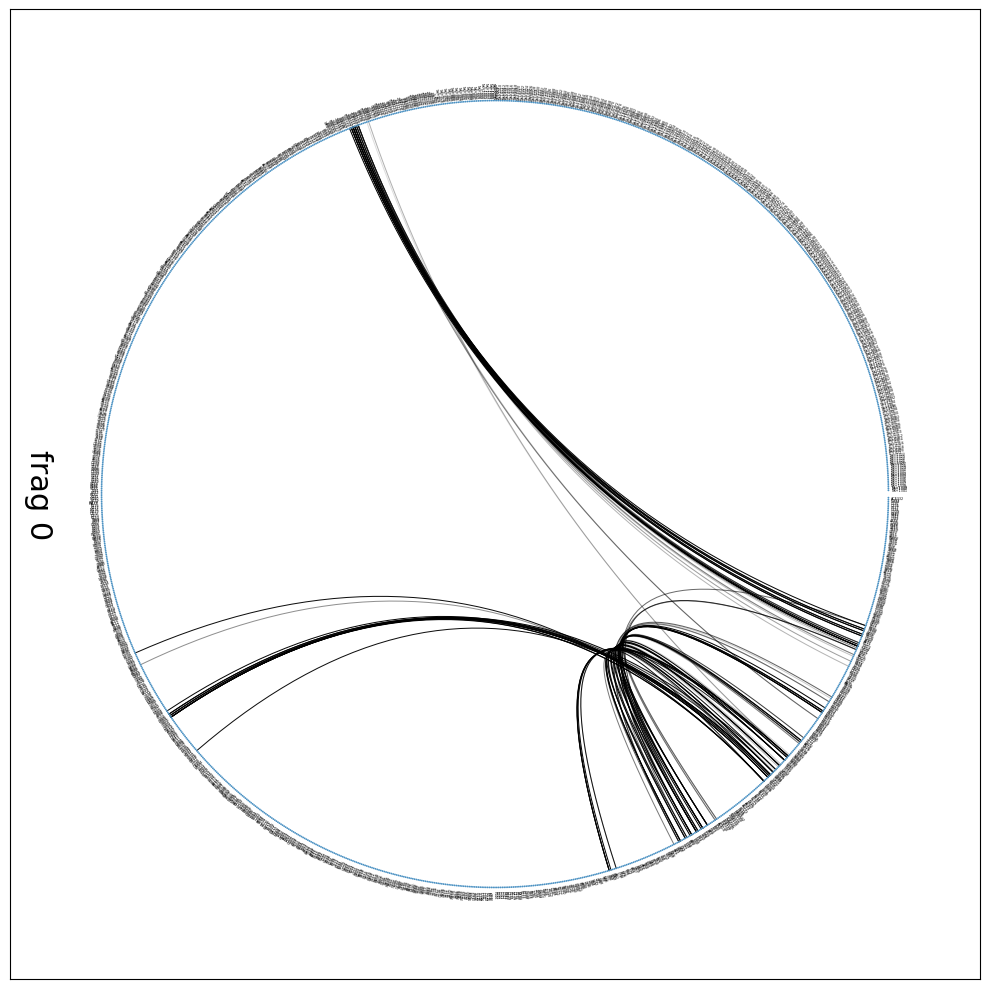

In [3]:
intfWT = interfaces["WT"]
ifig, iax, flareplot_attrs = intfWT.plot_freqs_as_flareplot(4.5, scheme="all")

Wow! We can't see anything. Let's start tweaking the parameters and other variables. 

**You are highly encouraged to check these documentations** to get an idea of the available options of [mdciao.contacts.ContactGroup.plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot), and in particular:
    
* [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html)

because [plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot) thinly wraps around [freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html) and offers an ``**kwargs_freqs2flare`` argument. 


<div class="alert alert-info">
    
<b>Note</b> 
    
When possible, it's **even better** to check the docs directly without leaving the notebook by using the Shift+Tab
functionality.
    
</div>

### Including Fragment Information
Although the individual contacts are *tagged* with their respective fragment names in the [ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html) (whatever fragment names got passed or generated when using [mdciao.cli.interface](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface)), the fragment themselves are not hard-coded into any attribute of the [ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html). 

<div class="alert alert-info">
    
<b>Note</b> 
    
The logic behind this is that you might want to choose different fragmentation heuristics  **after**  the computation has taken place without having to re-compute all distances again. In the future, maybe there will be a ``ContactGroup.re_fragment()`` method to do this properly.
    
</div>

**Meaning**: we can (or have to) re-generate the fragments here:


Auto-detected fragments with method 'chains'
fragment      0 with    196 AAs   ACE332 (   0) -   NME527 (195 ) (0)
fragment      1 with     10 AAs   UYB729 ( 196) -   0fA738 (205 ) (1)
fragment      2 with    709 AAs    ACE18 ( 206) -   NME726 (914 ) (2)
fragment      3 with     58 AAs   UYB739 ( 915) -   0fA796 (972 ) (3)
fragment      4 with      2 AAs    CL973 ( 973) -      ZN1 (974 ) (4) resSeq jumps
fragment      5 with    366 AAs   Na+976 ( 975) -  Na+1341 (1340) (5)
Drawing this many dots (1341 residues + 8 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


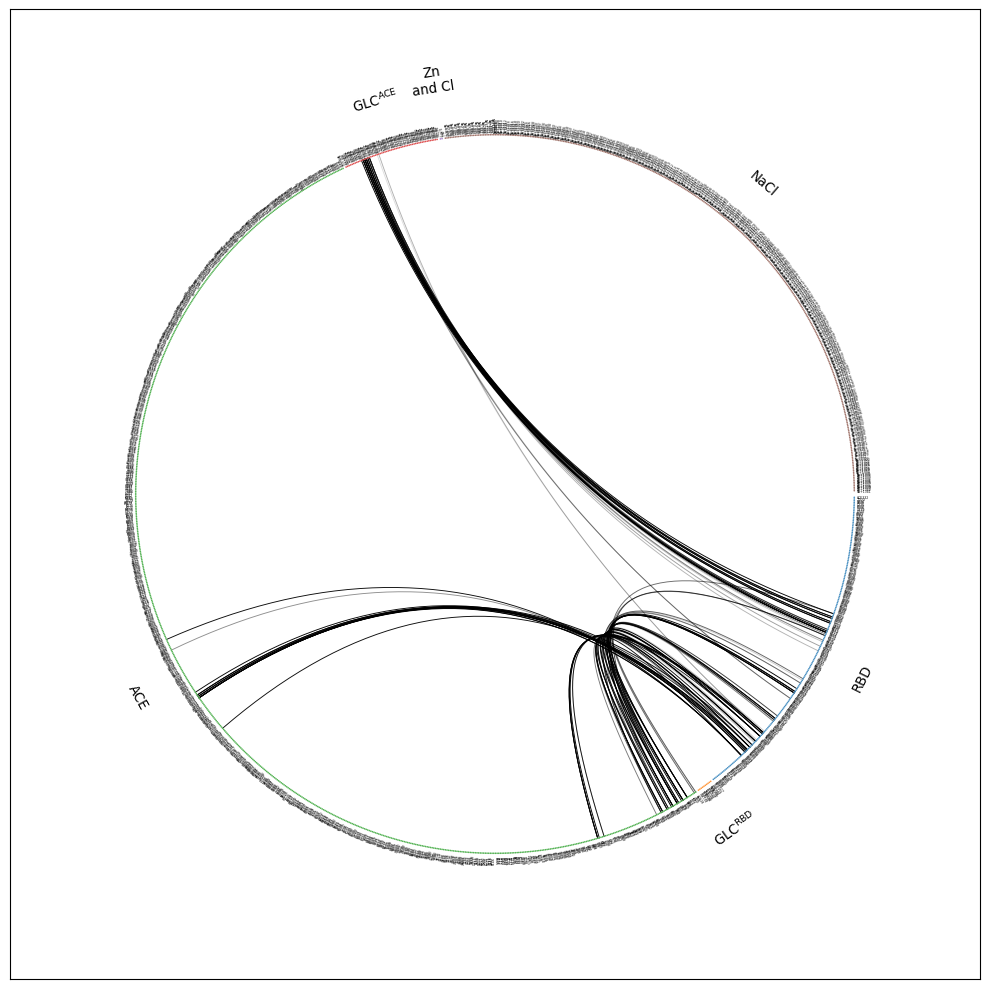

In [4]:
fragments = mdciao.fragments.get_fragments(intfWT.top,method="chains");
fragment_names = ["RBD","GLC^RBD", "ACE","GLC^ACE", "Zn\nand Cl","NaCl"]
ifig, iax, flareplot_attrs= intfWT.plot_freqs_as_flareplot(4.5, 
                                                           scheme="all",
                                                           fragments=fragments, 
                                                           fragment_names=fragment_names)

This is better but we can definitively get rid of the ``Zn and Cl``, ``NaCl``-fragment. We do so by simply omitting `scheme="all"`, which means we're using the default option `scheme="auto"` which means mdciao will try and use only fragments considered to be potential interface partners.The interface partners were chosen in the [notebook where the data comes from](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/Covid-19-Spike-Protein-Example.html) .

Drawing this many dots (973 residues + 6 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


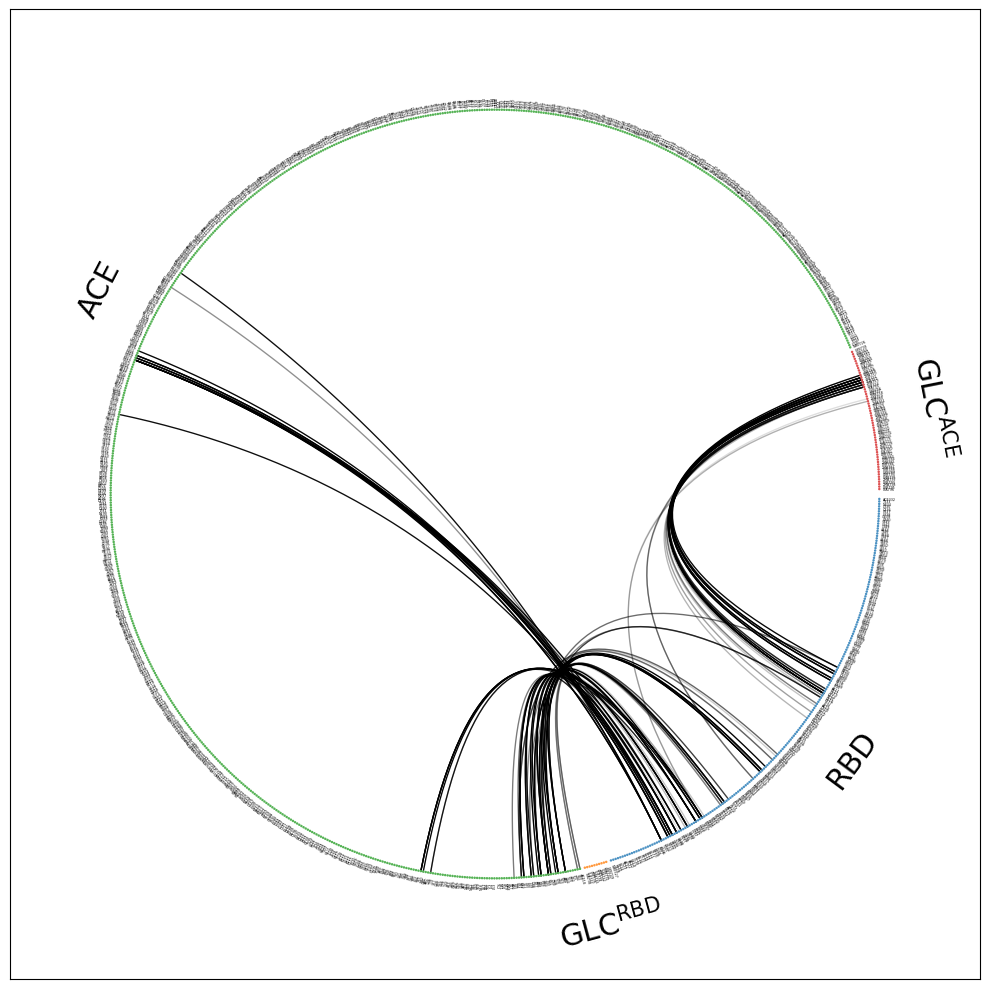

In [5]:
ifig, iax, flareplot_attrs = intfWT.plot_freqs_as_flareplot(4.5, fragments=fragments,
                                                            fragment_names=fragment_names)

This is better, but there's still a lot of information that's not really needed. Before we continue tweaking, just remember that there are **other** ways of looking at the interface frequencies in a much sparse way:

* [ContactGroup.plot_freqs_as_bars](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_bars):  
  This is the *sparsest* of all, since only non-zero contacts are plotted as bars. We've devoted an [entire notebook](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/03.Comparing_CGs_Bars.html) to these types of plots and comparisons.

* [ContactGroup.plot_interface_frequency_matrix](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.frequency_as_contact_matrix):  
  This is a contact matrix where the x-and y-axes contain only those residues of one side (of the interface) that have **at least one non-zero contact** with the other side. This means, no residue is shown unless it participates in the interface somehow. It's less sparse than [ContactGroup.plot_freqs_as_bars](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_bars) because it does contain a lot of blank pixels, but it's sparser than the [flareplot] because it's limited to the residues that participate in the interface. Let's check it out:

(<Figure size 3900x3200 with 1 Axes>, <Axes: >)

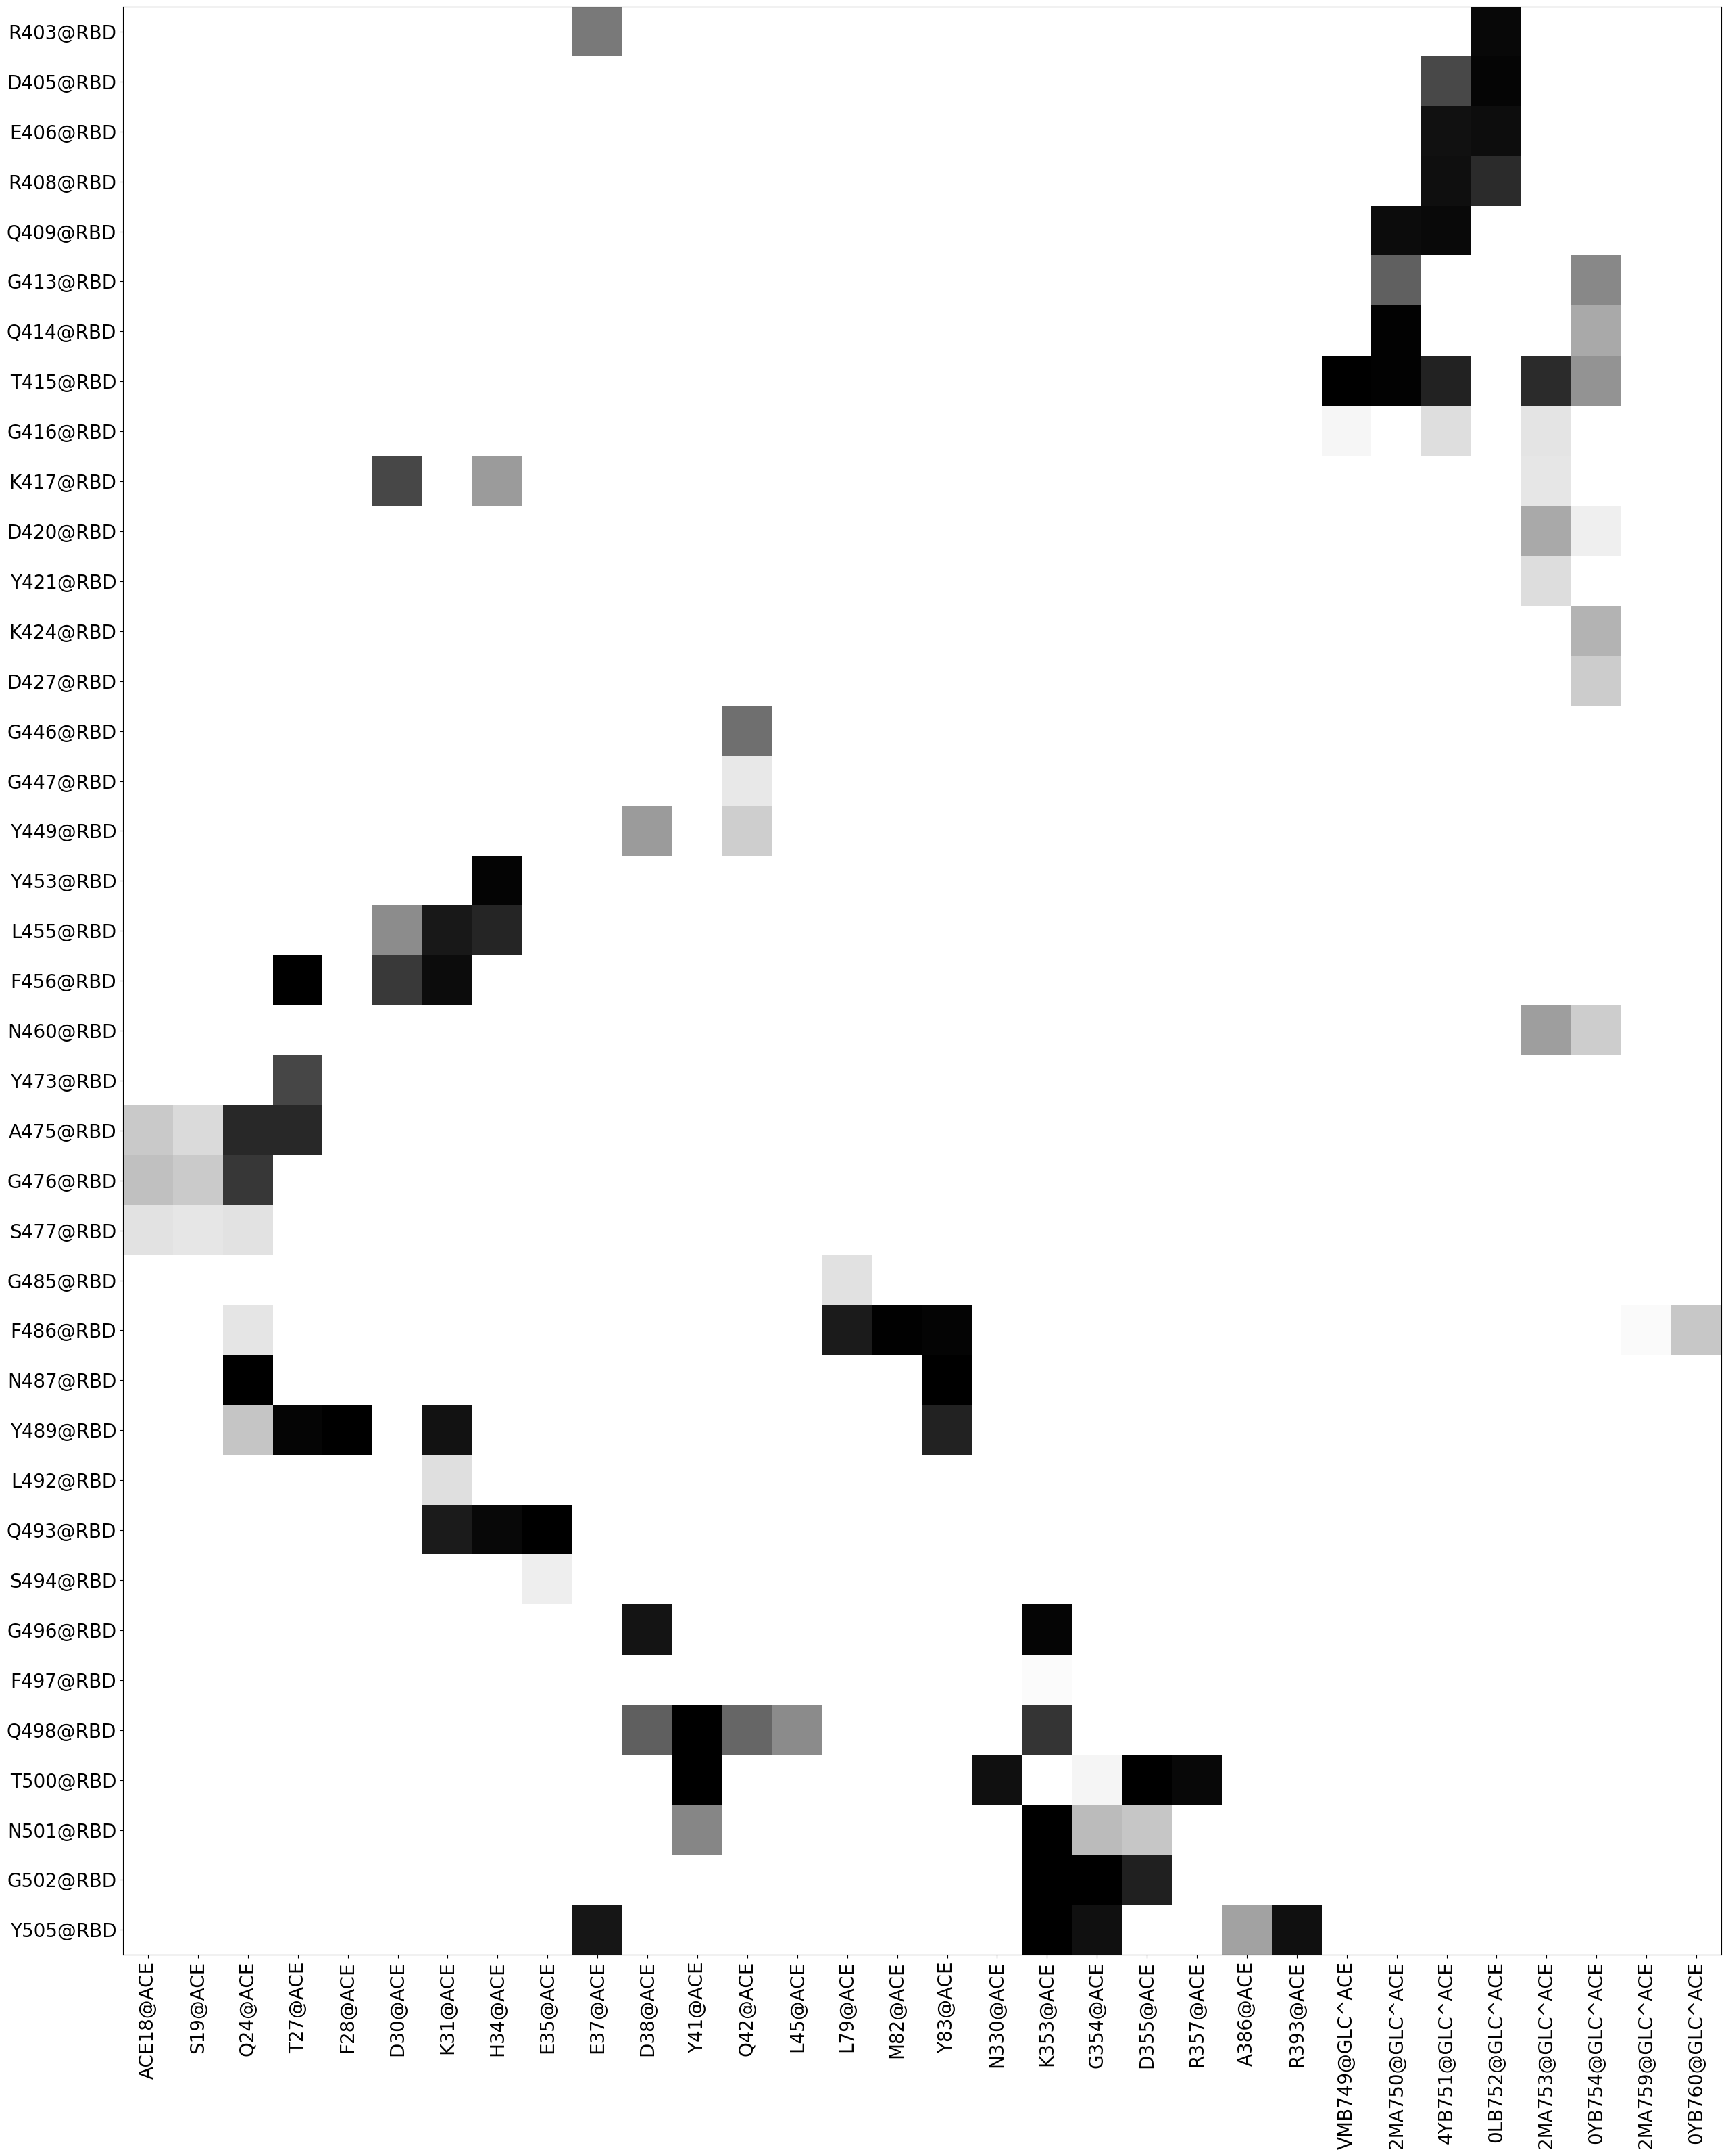

In [6]:
intfWT.plot_interface_frequency_matrix(4.5)

### Including Secondary Structure Information
Back to the flareplot, it's idea is to inform about molecular topology as well as contact frequencies, e.g. by breaking it down into sub-fragments using [Consensus Nomenclature](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html).

While we don't have this here, we can use **secondary structure** information to help visually break down the sub-units of the molecular topologies. Form the docs:
```
SS : secondary structure information, default is None
    Whether and how to include information about
    secondary structure. Can be many things
    * triple of ints (CP_idx, traj_idx, frame_idx)
      Go to contact group CP_idx, trajectory traj_idx
      and grab this frame to compute the SS.
      Will read xtcs when necessary or otherwise
      directly grab it from a :obj:`mdtraj.Trajectory`
      in case it was passed. Ignores potential stride
      values.
      See :obj:`ContactPair.time_traces` for more info
    * True
      same as [0,0,0]
    * None or False
      Do nothing
    * :obj:`mdtraj.Trajectory`
      Use this geometry to compute the SS
    * string
      Path to a filename, of which only
      the first frame will be read. The
      SS will be computed from there.
      The file will be tried to read
      first witouth topology information
      (e.g. .pdb, .gro, .h5) will work,
      and when this fails, self.top
      will be passed (e.g. .xtc, .dcd)
    * array_like
      Use the SS from here, s.t.ss_inf[idx]
      gives the SS-info for the residue
      with that idx
```

So, what we do next is to load one sample geometry for the ``WT``-setup and get the info from that geometry.

<div class="alert alert-info">
    
<b>Note</b> 
    
If we were running the notebook on the same filesystem as the one in which the interfaces were computed, we could easily use the option ``SS=True``, and ``mdciao`` would grab and load the necessary information. Here, and for this specific case of the documentation itself, that's not the case, so we have to load it extra.
    
</div>


/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Drawing this many dots (973 residues + 6 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


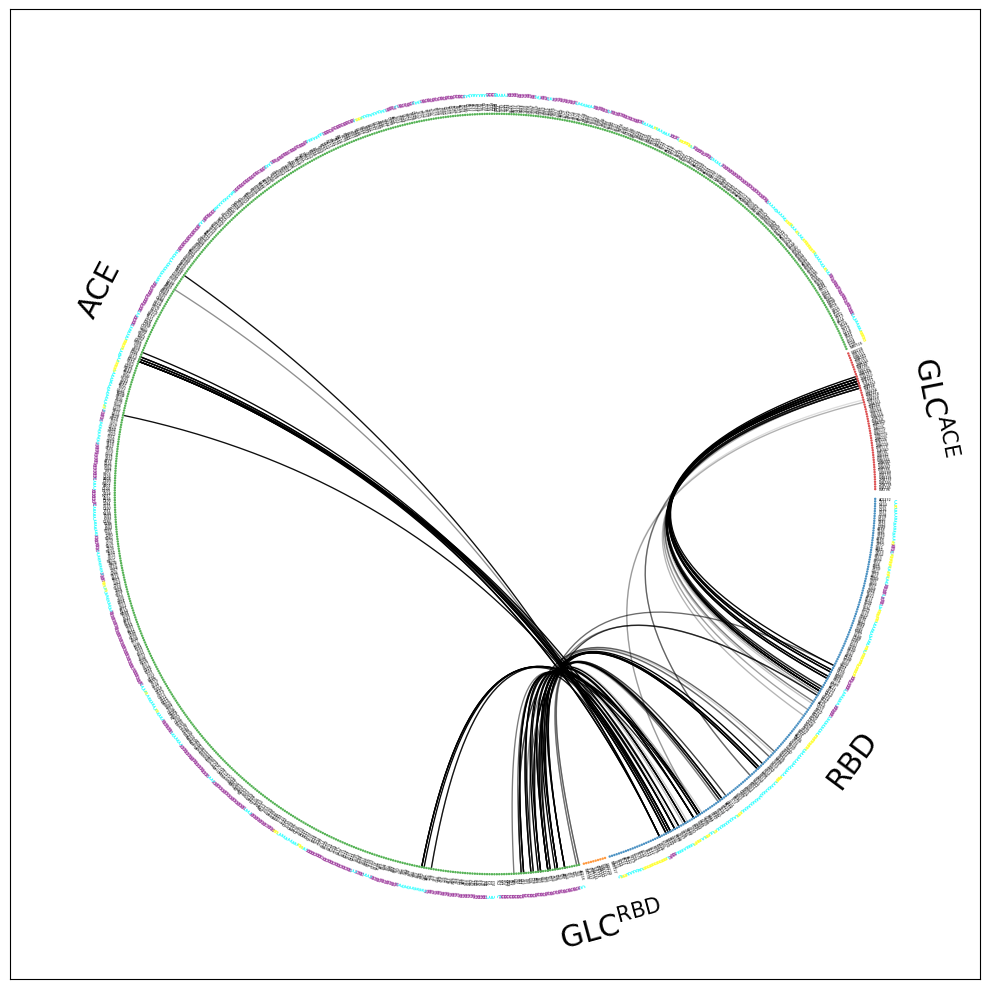

In [7]:
ifig, iax, flareplot_attrs = intfWT.plot_freqs_as_flareplot(4.5, fragments=fragments, 
                                                            fragment_names=fragment_names,
                                                            SS="example_cov19/run3-clone0.stride.050.h5")

Admittedly, a lot information and very small fontsize, but already helpful for some observations, like:

* ``ACE``'s N-terminal $\alpha$-helix (violet letters next to the green dots) having a lot of contact with the ``RBD`` domain second to last $\beta$-sheet (cyan letters next to blue dots).

* Other?

### Highlighting Residues
Next, we make use of ``highlight_residxs`` to highlight some residues of interest. In our case, we already knew the mutated residues had indices 87 and 107 [check the other notebook](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/Covid-19-Spike-Protein-Example.html), but just to be sure we can re-check here using :

In [8]:
mdciao.cli.residue_selection("K417,N439",intfWT.top, fragments=["chains"]);

Using method 'chains' these fragments were found
fragment 0 with    196 AAs   ACE332 (   0) -   NME527 (195 ) (0)
fragment 1 with     10 AAs   UYB729 ( 196) -   0fA738 (205 ) (1)
fragment 2 with    709 AAs    ACE18 ( 206) -   NME726 (914 ) (2)
fragment 3 with     58 AAs   UYB739 ( 915) -   0fA796 (972 ) (3)
fragment 4 with      2 AAs    CL973 ( 973) -      ZN1 (974 ) (4) resSeq jumps
fragment 5 with    366 AAs   Na+976 ( 975) -  Na+1341 (1340) (5)
0.0)       LYS417 in fragment 0 with residue index 85
0.0)       ASN439 in fragment 0 with residue index 107
Your selection 'K417,N439' yields:
   residue      residx    fragment      resSeq
    LYS417          85           0         417
    ASN439         107           0         439


So, let's highlight those with ``highlight_residxs=[85,107]``. From the docs:

```
highlight_residxs : iterable of ints, default is None
    Show the labels for these residues in red
```


/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Drawing this many dots (973 residues + 6 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


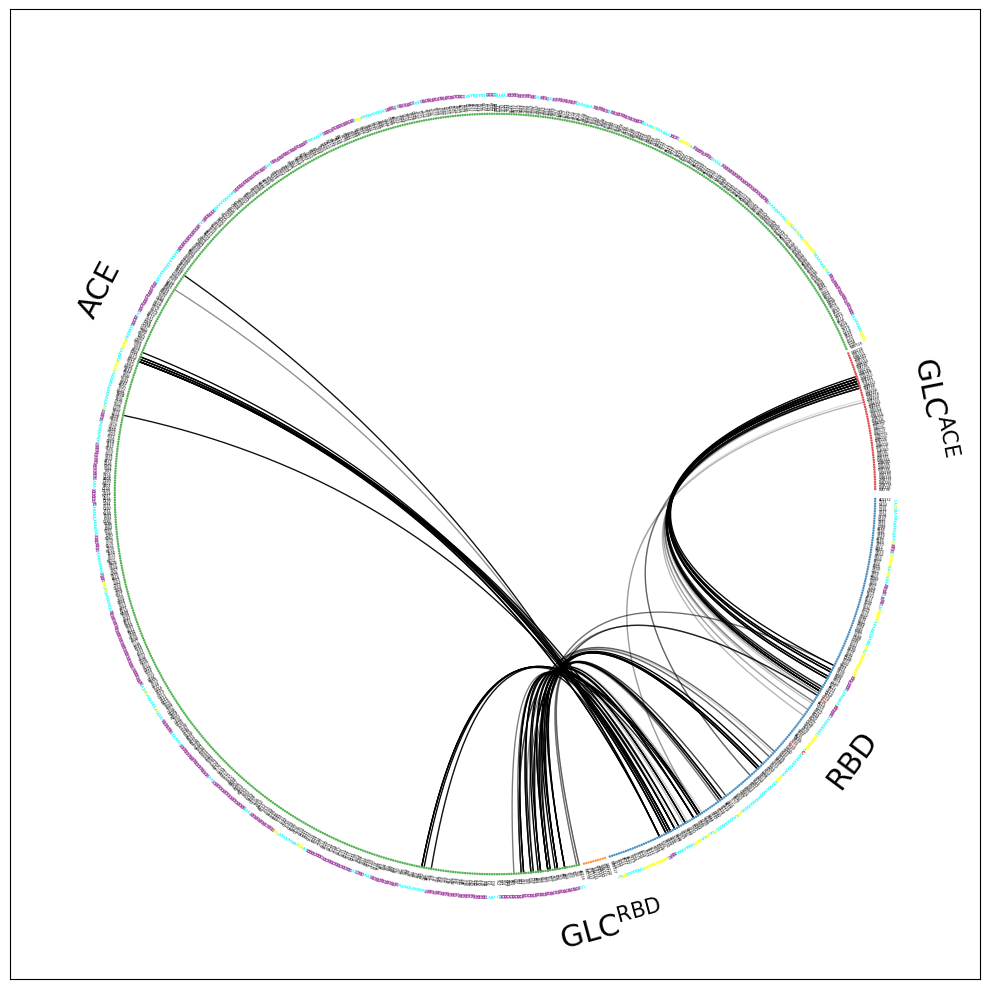

In [9]:
ifig, iax, flareplot_attrs = intfWT.plot_freqs_as_flareplot(4.5, fragments=fragments, 
                                                            fragment_names=fragment_names,
                                                            SS="example_cov19/run3-clone0.stride.050.h5",
                                                            highlight_residxs=[85,107], 
                                                           )

You still can't see anything, because, as ``mdciao`` has been warning us all these times:

>```
> Drawing this many dots (973 residues + 6 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. 
> If crowding effects occur, either reduce the number of residues or increase the panel size
>```

Increasing the panelsize is an option, but the notebook usually scales it down anyway to fit the width of the page. Can always save the figure as .pdf or .svg and zoom into it externally. 

What we can do is **reduce even more the number of shown residues**, by using the ``scheme="residues_sparse"`` option. This hides all residues (dots) with zero involvement in the interface. It will display the residue labels much more clearer, at the cost of loosing much of the topology information:


/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


Text(0.5, 1.0, 'WT\n$\\Sigma$ = 51.2')

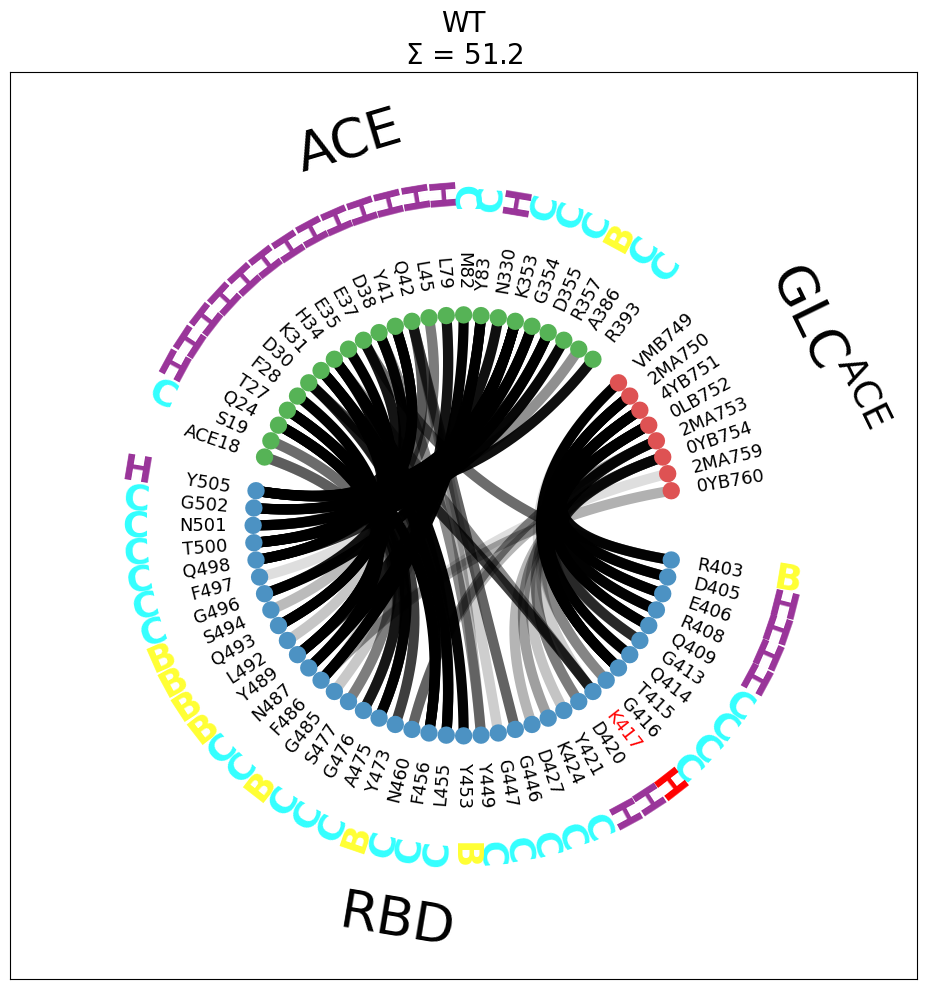

In [10]:
ifig, iax, flareplot_attrs = intfWT.plot_freqs_as_flareplot(4.5, fragments=fragments, 
                                                            fragment_names=fragment_names,
                                                            SS="example_cov19/run3-clone0.stride.050.h5",
                                                            highlight_residxs=[85,107],
                                                            scheme="residues_sparse",
                                                           )
iax.set_title("WT\n$\\Sigma$ = %2.1f"%intfWT.frequency_per_contact(4).sum(), fontsize=20)

Now we're only seeing the residues involved in the interface. The plot is much clearer, all the features are visible, like:

* the red highlight of `K417`
* the salt-bridge ``K417-D30``, that will be most likely affected by the `K417V` mutation
* the helical residues of ACE's first $\alpha$-helix 

In the title, we have also included $\Sigma$, the sum of all plotted contact-frequencies, to provide an indicator of the average number of contacts present(ed) in this interface.

### Tweaking the flareplot after plotting: flareplot attributes

It is challenging to cover all usecases (and tastes), with respect to how the figure should look like, by using named arguments only. This is why [ContactGroup.plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot) provides access to all elements of the plot (after they've been plotted) via the returned dictionary `flareplot_attrs`. From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot)
    
    Returns
    -------
    ifig : :obj:`~matplotlib.figure.Figure`
    ax : :obj:`~matplotlib.axes.Axes`
    flareplot_attrs : dict
        Flareplot attributes as dictionary containing
        matplotlib objects (texts, dots, curves etc)
        for further manipulation and fine tuning
        of the plot if necessary. See the returned
        values of :obj:`mdciao.flare.freqs2flare`
        for more information.

The keys of this dictionary are `'fragment_labels', 'dot_labels', 'dots', 'SS_labels', 'r', 'bezier_lw', 'bezier_curves'`.

For example, we're going to change the color of some labels by manipulating `fragment_labels` after the plot, using

```python
for text in flareplot_attrs["fragment_labels"]:
    if text.get_text().startswith("RBD"):
        text.set_color("tab:blue")
    elif text.get_text().startswith("ACE"):
        text.set_color("tab:green")
    else:
        text.set_color("tab:red")
```

/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


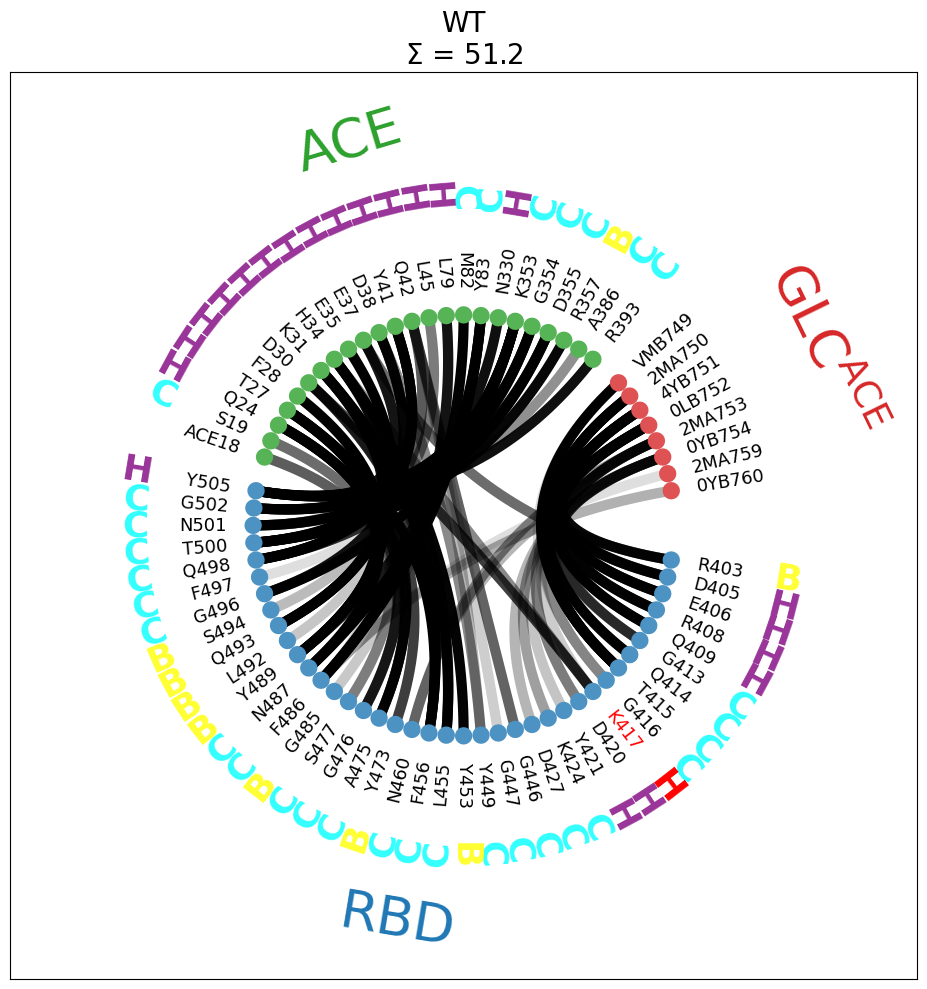

In [11]:
ifig, iax, flareplot_attrs = intfWT.plot_freqs_as_flareplot(4.5, fragments=fragments, 
                                                            fragment_names=fragment_names,
                                                            SS="example_cov19/run3-clone0.stride.050.h5",
                                                            highlight_residxs=[85,107],
                                                            scheme="residues_sparse",
                                                           )
iax.set_title("WT\n$\\Sigma$ = %2.1f"%intfWT.frequency_per_contact(4).sum(), fontsize=20)
for text in flareplot_attrs["fragment_labels"]:
    if text.get_text().startswith("RBD"):
        text.set_color("tab:blue")
    elif text.get_text().startswith("ACE"):
        text.set_color("tab:green")
    else:
        text.set_color("tab:red")      

## Multi-Panel Figure

Now we will use the options above to generate a 2x2 figure that contains **all four setups**. We can do this because, through the ``**kwargs_freqs2flare`` optional argument, an ``ax`` parameter to plot the flareplot on a specific [Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) is exposed:
```
ax : :obj:`~matplotlib.axes.Axes`, default is None
    Parse an axis to draw on, otherwise one will be created
    using :obj:`panelsize`.
```

So, we just create a 2x2 [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) and place the flareplots there.

/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")
/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")
/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")
/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


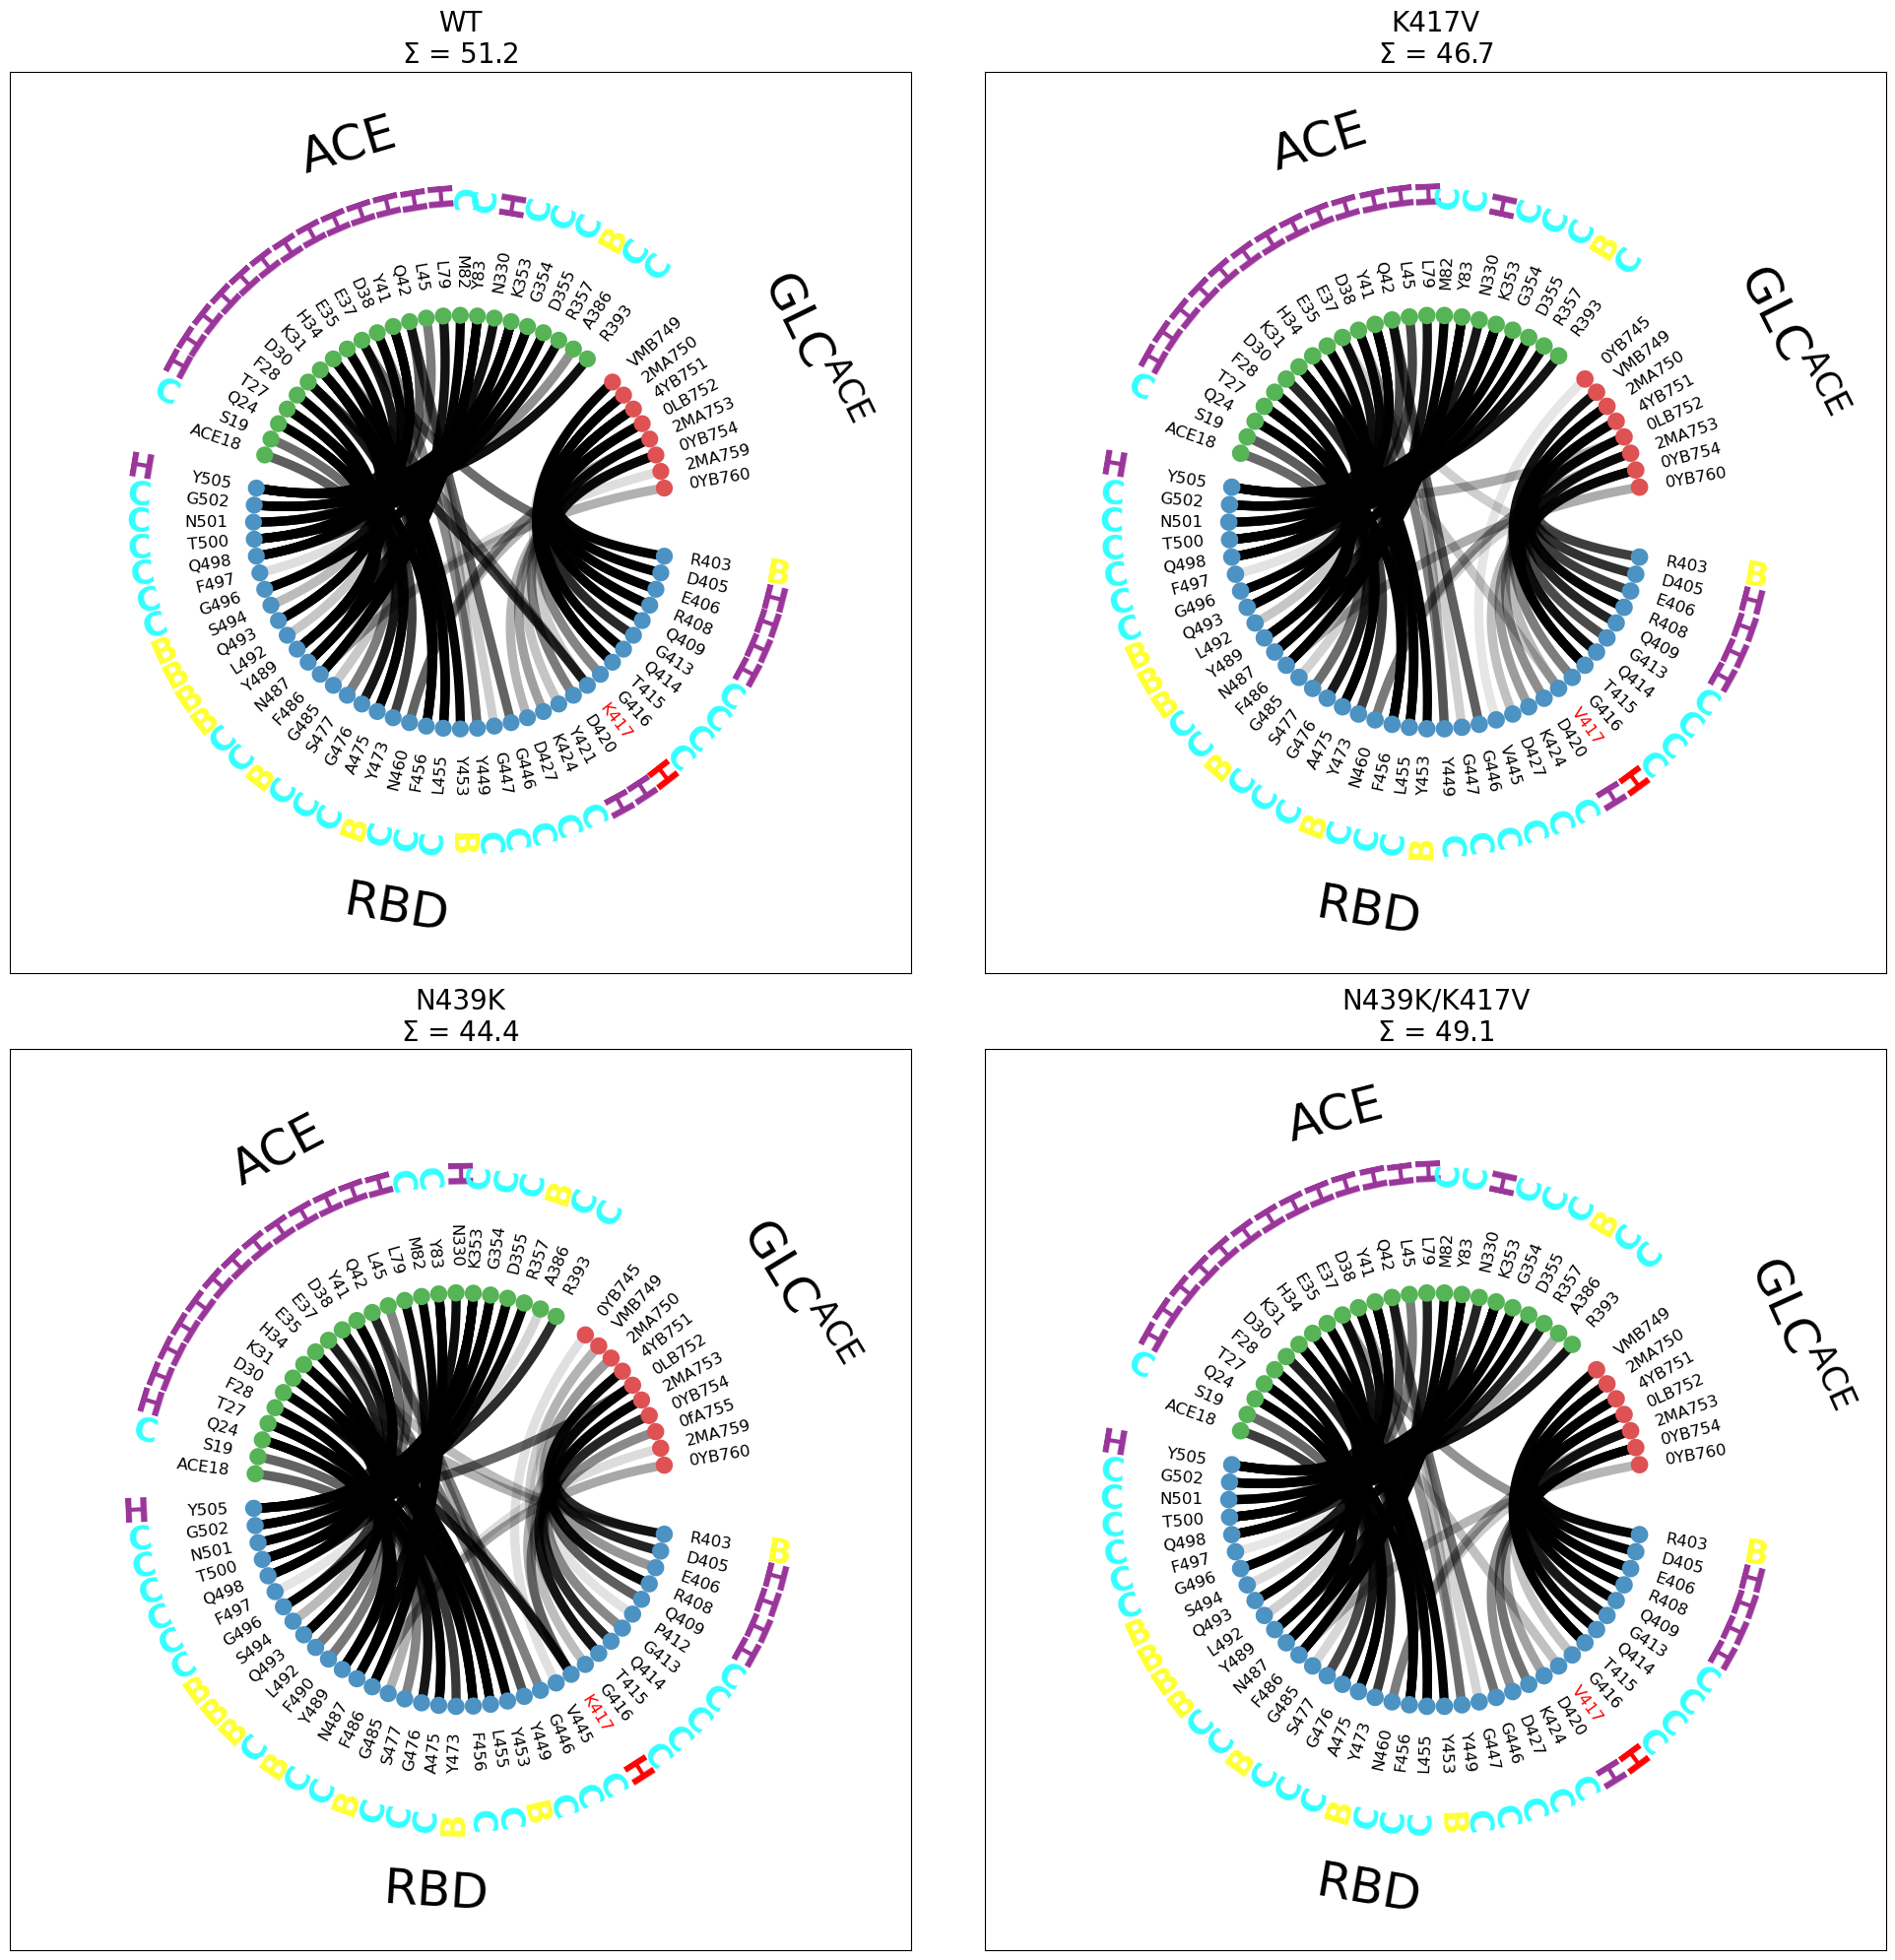

In [12]:
from matplotlib import pyplot as plt
myfig, myax = plt.subplots(2,2,
                           sharex=True,
                           sharey=True, 
                           figsize=(20,20), tight_layout=True)
for (setup, iintf), iax in zip(interfaces.items(),myax.flatten()):
    iintf.plot_freqs_as_flareplot(4.5, 
                                  fragments=mdciao.fragments.get_fragments(iintf.top, "chains", verbose=False), 
                                  fragment_names=fragment_names,
                                  SS="example_cov19/run3-clone0.stride.050.h5",
                                  highlight_residxs=[85,107],
                                  scheme="residues_sparse",
                                  lw=.1,
                                  ax=iax,
                                  subplot=True,
                                 )
    iax.set_title("%s\n$\\Sigma$ = %2.1f"%(setup, iintf.frequency_per_contact(4).sum()), fontsize=20)
myfig.tight_layout()

While the figure is compact and informative, the ``scheme="residues_sparse"`` has the side effect that **not all panels contain the same residues**. For example, in the double mutant ``N439K/K417V`` (lower right), ``V417`` is completely missing, because not only the salt bridge with ``D30`` is missing, also the contact with the ``ACE`` glycan. There are more examples of this, you can check the plots and spot missing residues here and there. 

Also, as we noted above, secondary-structure (SS) would be loaded automatically for each setup. However, since the original data is in a different filesystem, we are using the same sample file four plots. This is valid to a certain extent because no large changes in SS are expected.

### Common Background: Comparing Panels
**Generally speaking**, the more diverse the setups are, the more tweaking the comparison might need, because visual elements need to be conserved across panels, otherwise the comparison might be misleading. 

Here, *tweaking* can mean anything between hand-picking the residues to be shown (with indices valid across all setups) or resorting to sequence alignment to establish some equivalence between positions. In the end, the user needs to be sure that the comparison **makes sense**.

**In this case**, because the setups (except water molecules and salt ions at the end of the topology) are all equivalent and only differ by point mutations, we can establish that equivalence directly trough residue indices. To do so, first we need to first scan all four ``interfaces`` to get the [union set](https://en.wikipedia.org/wiki/Union_(set_theory)) of all needed residues

    union = np.unique(np.vstack([iintf.res_idxs_pairs for iintf in interfaces.values()])) 

and then pass them to the ``sparse_residues`` parameter of [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html), which we can access through the kwargs of [plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot)
```
 sparse_residues : boolean, default is False
    Show only those residues that appear in the initial :obj:`res_idxs_pairs`

    Note
    ----
    There is a development option for this argument where a residue
    list is passed, meaning, show these residues regardless of any other
    option that has been passed. Perhaps sparse changes in the future.
```


In [13]:
union = np.unique(np.vstack([iintf.res_idxs_pairs for iintf in interfaces.values()]))

/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")
/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")
/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")
/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


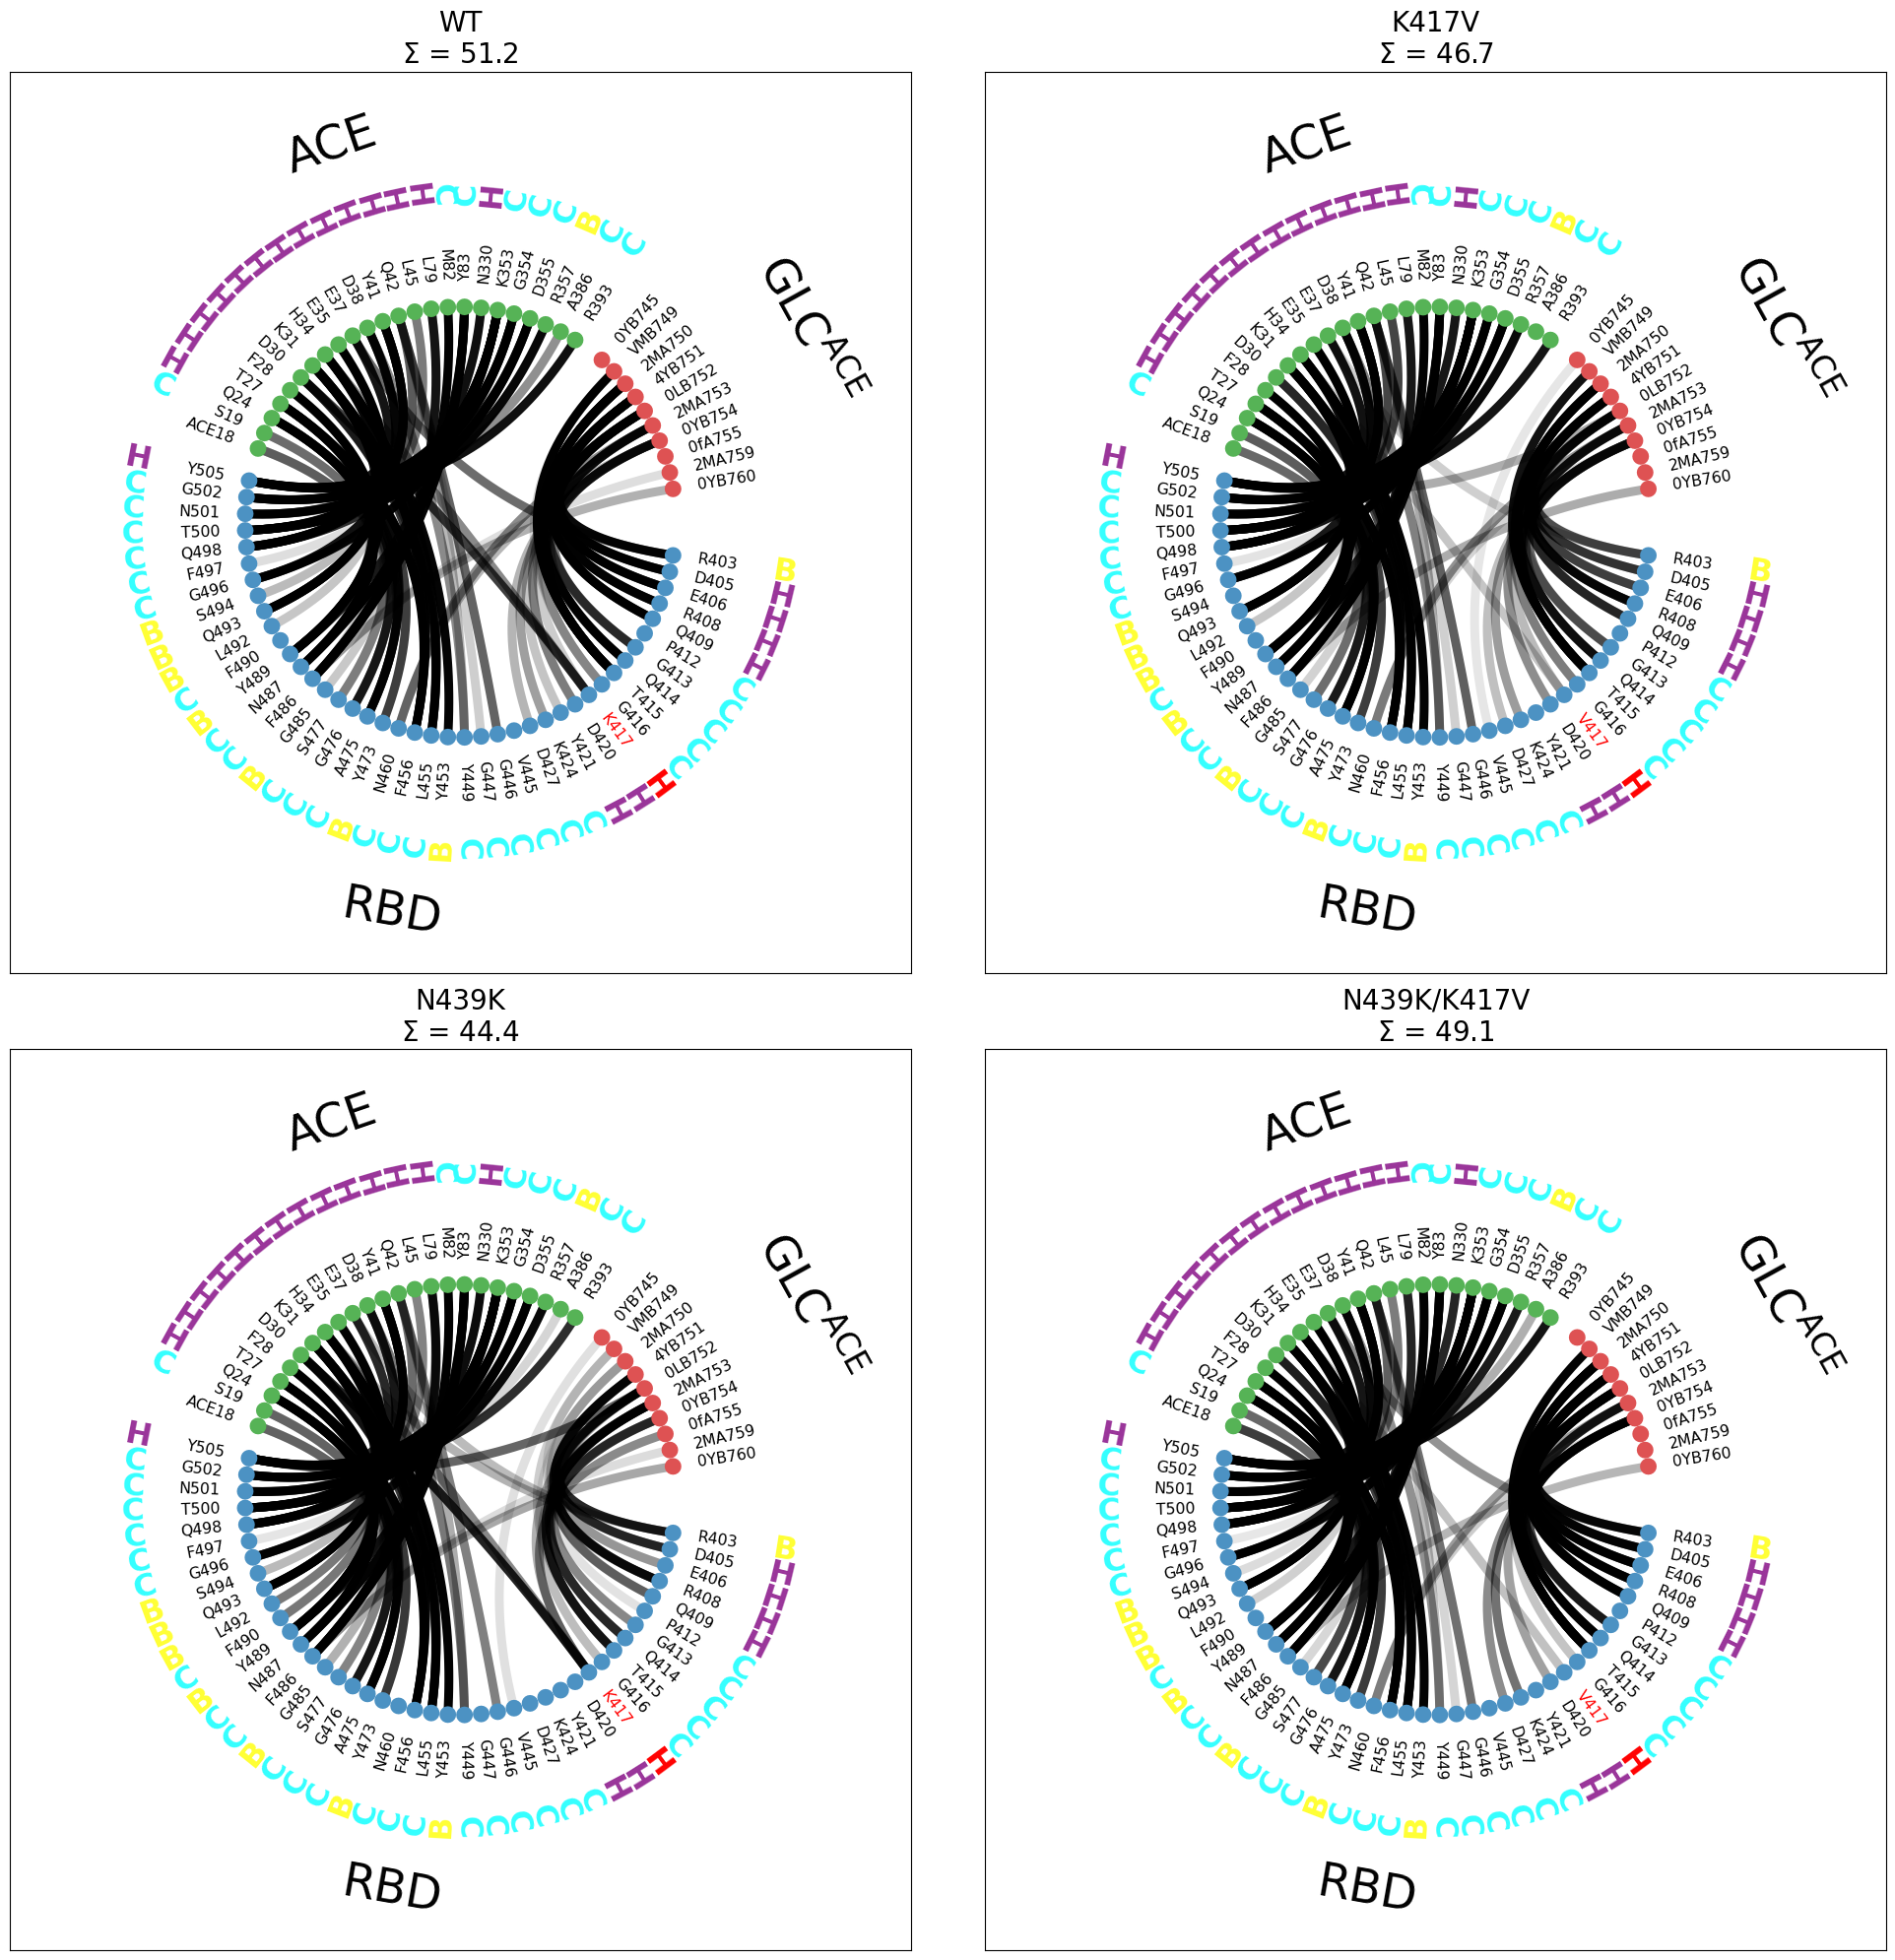

In [14]:
myfig, myax = plt.subplots(2,2,
                           sharex=True,
                           sharey=True, 
                           figsize=(20,20), tight_layout=True)
for (setup, iintf), iax in zip(interfaces.items(),myax.flatten()):
    iintf.plot_freqs_as_flareplot(4.5,         
                                  fragments=mdciao.fragments.get_fragments(iintf.top, "chains", verbose=False),  
                                  fragment_names=fragment_names,
                                  SS="example_cov19/run3-clone0.stride.050.h5",
                                  highlight_residxs=[85,107],
                                  sparse_residues=union,
                                  ax=iax,
                                  subplot=True,
                                 )
    iax.set_title("%s\n$\\Sigma$ = %2.1f"%(setup, iintf.frequency_per_contact(4).sum()), fontsize=20)
myfig.tight_layout()

Now, in the above plots, there circle of color-coded dots is always the same, so now we can visually spot the empty spaces e.g. in the 420-427 (RBD) positions when mutating ``N439K`` (lower panels). There's other differences, can you spot them?

## Overlaying Flareplots
Next, in case you don't find the plots **crowded enough**, you can overlay flareplots on top of each other and see if that's informative in your case.

<div class="alert alert-info">
    
<b>Note</b> 
    
This **might be a good idea** in cases where a group of contacts (=curves) has switched, e.g. from one subdomain to another, but it **generally isn't** if only one contact (=curve) has changed. It's up to the user to decide whether or not these overlays are informative or not.

</div>


Here, we just show how it's done in case you find it useful for your system. Two steps are involved:

* First, we call [plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot) normally, to provide the first flareplot and the background of dots and labels.

* Second, we call [plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot) again, using ``plot_curves_only=True`` and passing the ``ax=myax`` of the previous call. From the docs:
```
ax : :obj:`~matplotlib.axes.Axes`
    Parse an axis to draw on, otherwise one will be created
    using `panelsize`. In case you want to
    re-use the same circle of residues as a
    background to plot different sets
    of `freqs`, **YOU HAVE TO USE THE SAME**
    `fragments` and `sparse` values
     **on all calls**, else the
    bezier lines will be placed erroneously.
[...]
plot_curves_only : bool, default is False
    Only plot the curves connecting the dots, but
    not the dots themselves or any other annotation.
    (labels, fragment names or SS information).
    The same caution as :obj:`ax` applies.
```

Note that in order to tell curves apart, we use a color code and pass it as an argument to ``bezier_linecolor``:
```
bezier_linecolor : color-like, default is 'k'
    The color of the bezier curves connecting the residues.
    Can be a character, string or RGB value (not RGBA)
```

In [15]:
colors = {"WT":"black", "K417V":"green","N439K":"pink", "N439K/K417V":"blue"}

/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


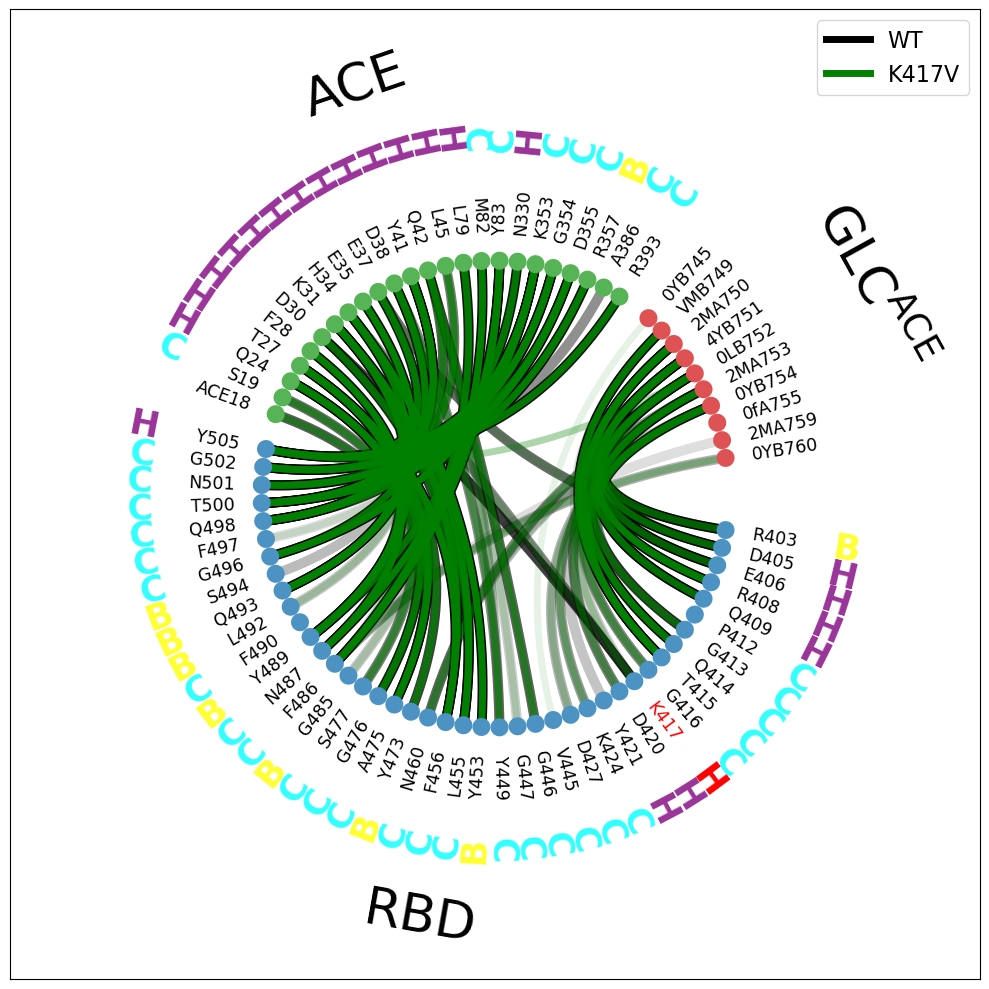

In [16]:
key1 = "WT"
ifig, iax, flareplot_attrs = interfaces[key1].plot_freqs_as_flareplot(4.5, 
                                                                      fragments=mdciao.fragments.get_fragments(interfaces[key1].top, "chains", verbose=False), 
                                                                      fragment_names=fragment_names,
                                                                      SS="example_cov19/run3-clone0.stride.050.h5",
                                                                      highlight_residxs=[85,107],
                                                                      sparse_residues=union,
                                                                      bezier_linecolor=colors[key1],
                                                                     )
key2="K417V"
ifig, iax, flareplot_attrs = interfaces[key2].plot_freqs_as_flareplot(4.5, 
                                                                      fragments=mdciao.fragments.get_fragments(interfaces[key2].top, "chains", verbose=False), 
                                                                      #fragment_names=fragment_names[:-2],
                                                                      #SS="run3-clone0.stride.050.h5",
                                                                      #highlight_residxs=[85,107],
                                                                      sparse_residues=union,
                                                                      bezier_linecolor=colors[key2],
                                                                      ax=iax,
                                                                      plot_curves_only=True
                                                                     )
[iax.plot(np.nan, np.nan, label=key,color=colors[key], lw=5) for key in [key1,key2]]
myfig.suptitle("WT vs K417", y=1.01, fontsize=16)
plt.legend(fontsize=16);

Note that, for the second call of [plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot), we have commented out all the info regarding annotations, but left the ``fragments`` and ``sparse`` like in the first call.

Also note that, as mentioned in the note above, the overlay itself isn't very informative, since many lines are equally opaque or equally transparent, and some opaque (strong) green lines could be on top of weak black lines.

**Please note again**, the purpose of this plot is to show the mechanics and parameters involved in constructing the overlay, not in whether the overlay is informative or not.


## The Lower-Level Method ``freqs2flare``
``mdciao`` exposes a lower-level method, [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html), that generates flareplots from any type of numerical pairwise relation, not necessarily between residues, depending on a molecular topology and or fragment definitions or names. The minimal cal is pretty straightforward, but it offers a lot of customization:

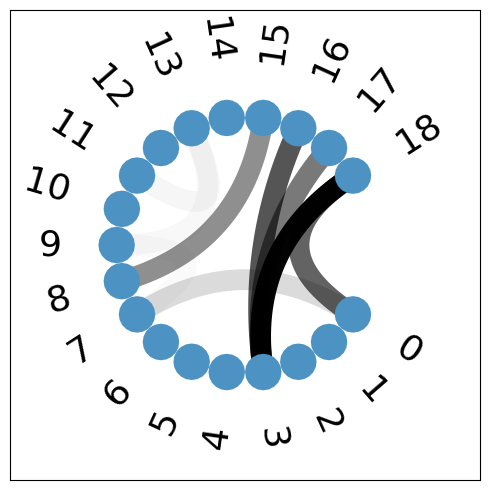

In [17]:
n_dots = 20
n_freqs = 10
# Random pairs
pairs = np.random.randint(0,n_dots-1,size=(n_freqs,2)) 
# Random freqs
freqs = np.random.random(n_freqs)
mdciao.flare.freqs2flare(freqs,
                         pairs, 
                         panelsize=5
                        );

For the next example, we use [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html) with some customization to generate flareplots like the ones above.

## Plotting Frequency Differences
Finally, another possibility is to showcase contact differences directly, i.e., not the frequency values **themselves**, but the **change** in those values between pairs of datasets. This will make equally strong (or equally weak) contacts (=curves) vanish from the plot and instead direct the eye towards large changes. It's somewhat equivalent to the ``sort_by='std'`` option of the [mdciao.plots.compare_groups_of_contacs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.plots.compare_groups_of_contacts.html), that we have dicussed in the [other notebook](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/03.Comparing_CGs_Bars.html#Sorting-by-Standard-Deviation).

<div class="alert alert-info">

<b>Note</b> 
    
As is mentioned elsewhere in the docs, **hard-cutoffs** have the downside of over- or underestimating numerical frequencies in some cases, because not all types of interactions occur at the same distance (e.g. salt-bridge vs. pi-stacking). In some corner cases, the value of a frequency can change drastically at slightly different cuttoffs, although that is **generally not the case**.
    
Thus, the numerical value of the contact frequencies should be used mostly to identify trends and or guide the attention towards a selected group of residues. Making an entire argument depend on whether a contact has a frequency of .75 or .85, without further inspection **can be risky**. 

</div>

The above note not withstanding, we are now going to compute frequency differences and plot them, to see if we see something.

For that, the [ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html) **itself** has a method that computes differences between contact frequencies, [frequency_delta](file:///home/guille/Programs/mdciao/doc/_build/html/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.frequency_delta). From the docs:

```
Compute per-contact frequency differences between :obj:`self` and some other :obj:`ContactGroup`

The difference is defined as

:math:`\Delta_{AB} = freq_B - freq_A`
```

/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:440: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


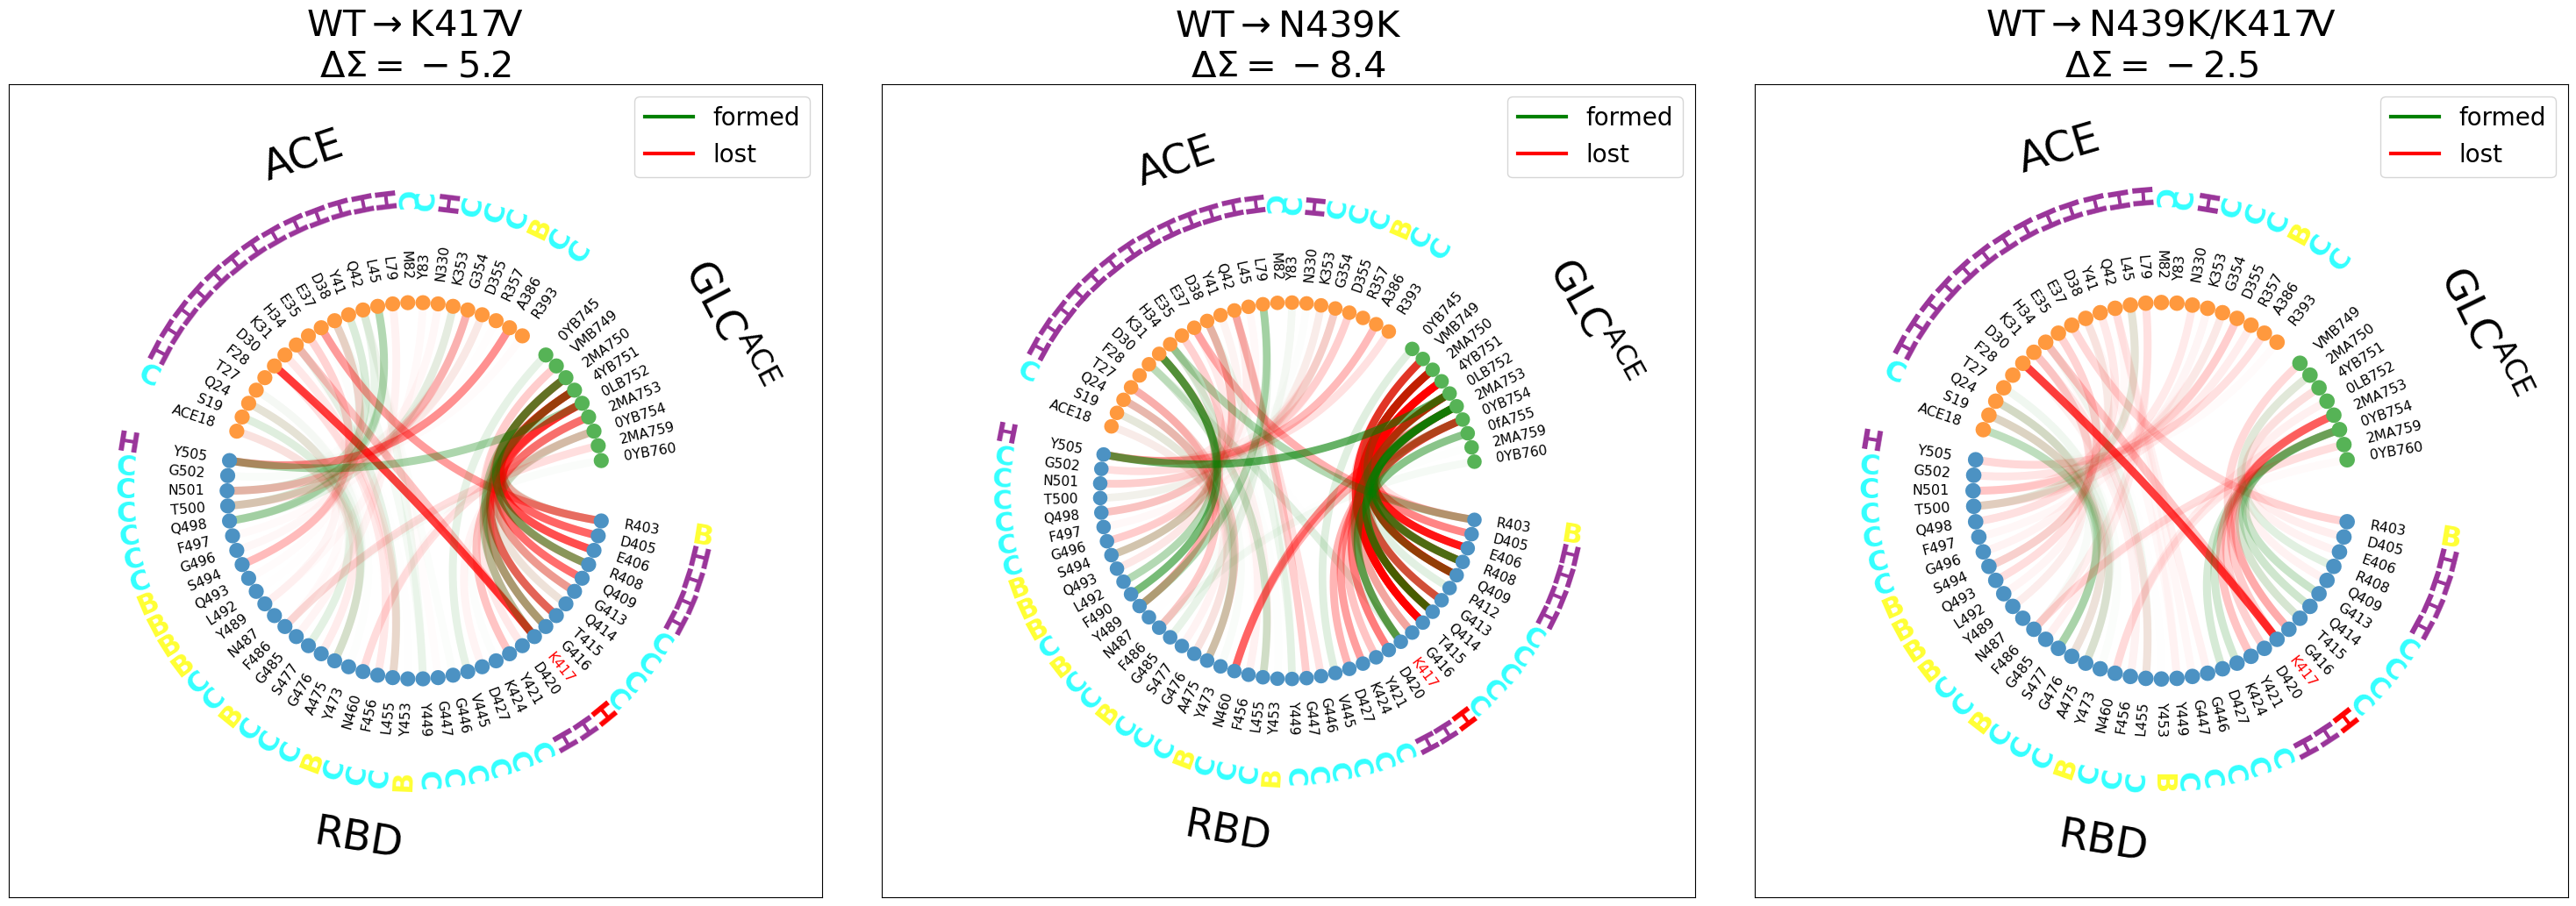

In [18]:
myfig, myax = plt.subplots(1, 3,sharex=True, sharey=True, figsize=(30,10),
                           tight_layout=True)
for key, iax in zip(["K417V", "N439K", "N439K/K417V"], myax):
    delta, pairs = interfaces["WT"].frequency_delta(interfaces[key],4.5)
    mdciao.flare.freqs2flare(delta, pairs, 
                             sparse_residues=True, 
                             fragments=fragments,
                             fragment_names=fragment_names,
                             highlight_residxs=[85,107],
                             signed_colors={-1:"r", +1:"g"},
                             top=interfaces["WT"].top,
                             SS="example_cov19/run3-clone0.stride.050.h5",
                             ax=iax,
                             #subplot=True
                     );
    [iax.plot(np.nan, np.nan, color=col, lw=3, label=key) for key, col in {"formed":"g", "lost":"r"}.items()]
    iax.set_title("%s$\\rightarrow$%s\n$\\Delta \\Sigma = %2.1f$"%("WT",key,delta.sum()),fontsize=30)
    iax.legend(fontsize=20)
myfig.tight_layout()

Some observations (it's better to look at the figure externally with *right-click->Open Image in New Tab*):

* We have included the $\Delta\Sigma$ to highlight whether the interface gains or looses contacts upon mutation.
* For ``WT``$\rightarrow$``K417V`` (left panel):
  * disruption of the ``K417@RBD-D30@ACE`` salt-bridge, highlighted in red (also in the the double mutant) and the ``E37-R403`` salt bridge as well.
  * ``Y505@RBD`` loosing contact with ``ACE`` and gaining it with ``ACE``'s glycan, although this effect is much stronger in the next panel.
  * The ``RBD-GLC@ACE`` interface is getting weaker ($\Delta \Sigma$ = -4.5)

* For ``WT``$\rightarrow$``N439`` (middle panel):
  * ``Y505@RBD`` loosing contact with ``ACE`` and gaining it with ``ACE``'s glycan
  * different interactions between the ``ACE`` and ``RBD`` are forming: the ``RBD`` region ``L492, F490, Y489`` contacts ``Y83`` and ``K31``, both ``@ACE``. 
  * The ``ACE`` glycan loosing some contacts with RBD and/or swapping partner (e.g.  ``T415@ACE`` for ``Q414@ACE``)
  
* For ``WT``$\rightarrow$``N439K/K417V`` (right panel):
  * Disruption of the salt-bridge
  * Swapping of interaction partners between ``RBD`` and the ``ACE`` glycans
  
